# **PENS AND PRINTERS - ANALYSIS OF SALE STRATEGIES**

In [95]:
# importinf libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal

In [96]:
#reading csv
sales= pd.read_csv("product_sales.csv")

In [97]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [98]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [99]:
# many null values present

In [100]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [101]:
# revenue is not normally distributed, revenue should be filled with median
# how can someone have 63 years of relation with company if company was founded in 1984

In [102]:
# replacing most repeating values with years_as_customer > 39 (2023-1984 = 39)

In [103]:
mod_rev=sales.years_as_customer.mode()[0]

In [104]:
sales.revenue.loc[sales.years_as_customer > 39]=mod_rev

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_13248\1550379816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.revenue.loc[sales.years_as_customer > 39]=mod_rev


In [105]:
sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [106]:
sales.revenue.fillna(sales.revenue.median(),inplace=True)

In [107]:
sales.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [108]:
# data inconsistency founded

In [109]:
sales.state.nunique()

50

In [110]:
# converting values to lowercase

In [111]:
sales['sales_method']=sales['sales_method'].str.lower()

In [112]:
# replacing inconsistency

In [113]:
sales.replace({"em + call":"email + call"},inplace=True)

## Data Validation

The dataset initially consisted of 15000 rows and 8 columns, which were thoroughly validated and cleaned against specific criteria.

- week: The "week" column, which contained numerical values ranging from 1 to 6, **did not require any cleaning**.
- sales_method: The "sales_method" column initially had **five categories instead of three**. To address this, the values were converted to lowercase and "em + call" was replaced with "email + call". 
- customer_id: The "customer_id" column contained no duplicates and was of object type, and thus **did not require any cleaning**.
- nb_sold: Similarly, the "nb_sold" column had numerical data type and **did not require any cleaning**.
- revenue: The "revenue" column had float type, but was missing 1074 values, necessitating cleaning. The **missing values were filled** with the average value of revenue.
- years_as_customer: The "years_as_customer" column had numerical data type, but two values were found to be **greater than 39**, which is impossible as the company was founded in 1984. These values were replaced with the mode value.. 
- nb_site_visits: The "nb_site_visits" column contained numerical data type and had no missing values, **hence no cleaning was require**d.
- state: Finally, the "state" column contained 50 unique values, with no duplicates and was of object data type, requiring no further cleaning.
Validation completed, dataset contains **15000 rows and 8 columns** after validation.

# **EXPLORATORY ANALYSIS**

## How many customers were there for each approach?

**Customers and sales methods - Bar chart**

Based on the bar chart, it is evident that email was the most popular sales method, with over 7000 customers,followed by calls, with about 5000 customers using this method.And by combination of both email and calls was used by around 2500 customers.

Even though these findings suggest that email may be a more effective sales method for reaching customers than calls alone, we cant confirm it without further analysis

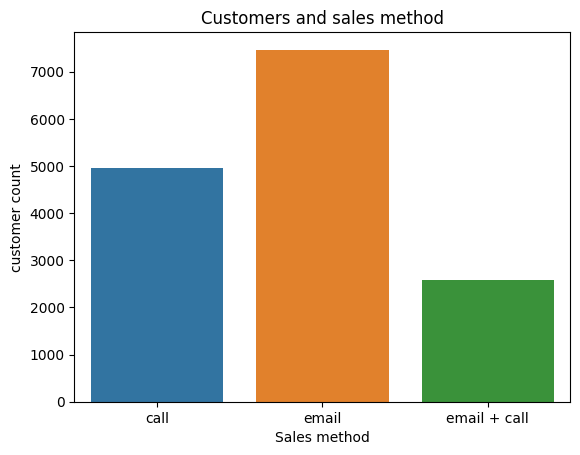

In [114]:
sales_approach=sales.groupby('sales_method')['customer_id'].count().reset_index()
sns.barplot(x=sales_approach.sales_method,y=sales_approach.customer_id)
plt.title('Customers and sales method')
plt.xlabel('Sales method')
plt.ylabel('customer count')
plt.show()

**Customers proportions by sales method - Pie chart**

According to the pie chart, approximately half of the customers weere using email as their sales method, while about one-third were using calls.

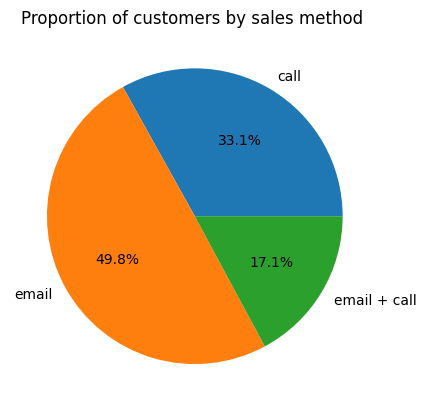

In [115]:
revenue_by_method = sales.groupby('sales_method')['customer_id'].count().reset_index()
plt.pie(revenue_by_method.customer_id, labels=revenue_by_method.sales_method, autopct='%1.1f%%')
plt.title("Proportion of customers by sales method ")
plt.show()

##  What does the spread of the revenue look like overall? And for each method?

**Revenue Distribution - Histogram**

After analyzing the histogram plot, it can be observed that the revenue data is right skewed, indicating that there are a few high revenue values that are driving the overall distribution to the right. The majority of purchases were made at around `$100 and $50`.

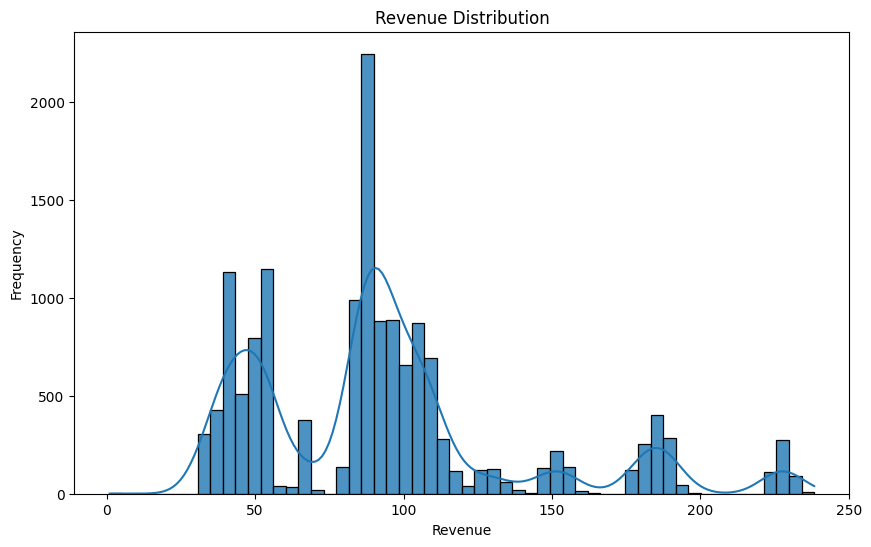

In [116]:
plt.figure(figsize=[10,6])
sns.histplot(data=sales, x='revenue', alpha=0.8, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


**Revenue distribution by sales method - Box plots**

An interesting observation from the revenue data with respect to sales methods is that although the count of customers using the 'email + call' sales method was low,  they tended to purchase in wide price range, mostly expensive purchases compared to other methods.

This highlights the distinct characteristics associated with different sales methods and the range of purchases made by customers using them. Additionally, the data suggests that email sales methods the purchases are more around `$100`, whereas call sales methods have the least revenue range.

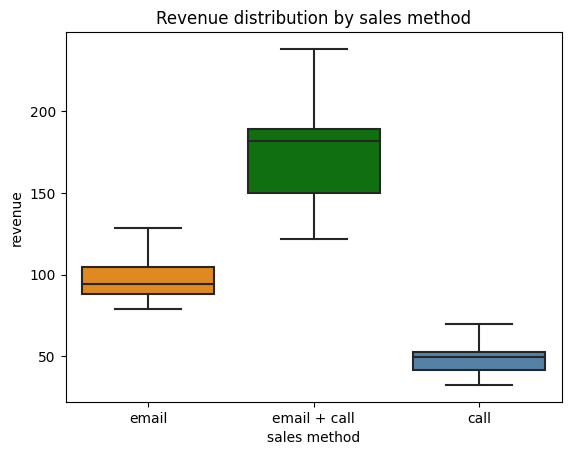

In [117]:
sns.boxplot(x=sales.sales_method,y=sales.revenue,sym='',palette=['darkorange','green','steelblue'])
plt.title("Revenue distribution by sales method")
plt.xlabel("sales method")
plt.show()

## hypothesis testing

#### null hypothesis is there is no relation between the sales methods and revenue

In [130]:
# we use kruskal h test because the data is not normally distributed
# have high variance

In [127]:

email=sales.revenue[sales.sales_method=='email'].tolist()
email_call=sales.revenue[sales.sales_method=='email + call'].tolist()
call=sales.revenue[sales.sales_method=='call'].tolist()


f_stat, p_value = stats.kruskal(email,email_call,call)


print("F-statistic:",f_stat)
print("P-value:",p_value)
if p_value< 0.15:
    print("""Null hypothesis rejected, there is atleast one sales 
method wich impacts the revenue """)
else:
    print("""Null hypothesis accepted, there is atleast no sales 
method wich impacts the revenue """)

F-statistic: 11336.726992850387
P-value: 0.0
Null hypothesis rejected, there is atleast one sales 
method wich impacts the revenue 


In [131]:
#F- stastistic show there is huge difference between the sales_method revenue generation

**Total revenue by sales method- Bar chart**

Based on the data data visualization, it is evident that the email sales strategy generated the most revenue, with over `7.2M$`,Following by "email + call" with `4.4M` and least revenue of `2.4M$` with call strategies.

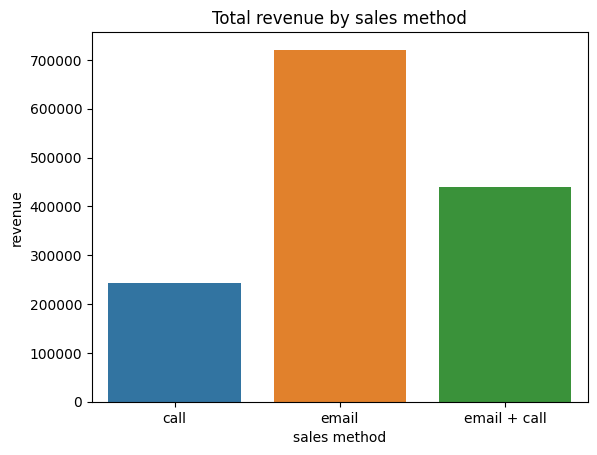

In [119]:
revenue_by_method=sales.groupby('sales_method')['revenue'].sum().reset_index()
sns.barplot(y=revenue_by_method.revenue,x=revenue_by_method.sales_method)
plt.title("Total revenue by sales method")
plt.xlabel("sales method")
plt.show()

**Average revenue by sales method- Bar chart**

The data indicates that the email and call sales method generated the highest average revenue. Despite being used by a smaller number of customers, this method resulted in purchases of high-value products.

In [120]:
sales_cust = sales.groupby('sales_method').agg({'customer_id': 'count', 'revenue': 'sum'})
sales_cust['avg_rev']=sales_cust.revenue/sales_cust.customer_id
sales_cust

,customer_id,revenue,avg_rev
sales_method,,,
call,4962,243713.52,49.115985
email,7466,720909.61,96.559016
email + call,2572,439492.19,170.875657


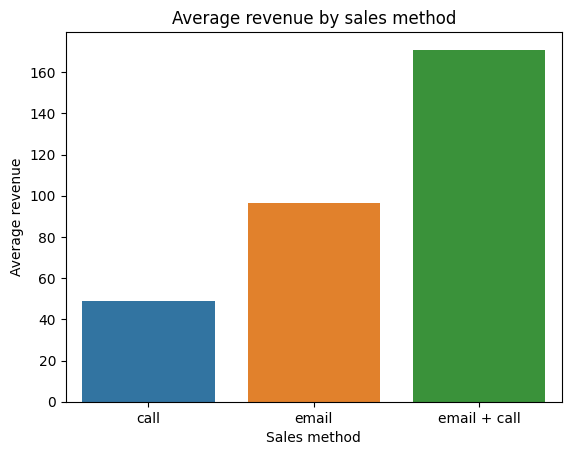

In [121]:
sns.barplot(x=sales_cust.index,y=sales_cust.avg_rev)
plt.title("Average revenue by sales method")
plt.xlabel("Sales method")
plt.ylabel("Average revenue")
plt.show()


## Was there any difference in revenue over time for each of the methods?

**Revenue by week - Stacked bar chart**

The analysis becomes more complex from this point onwards. While observing the total revenue generated over the week, we notice that there is no consistent trend, But when we analyze the revenue generated by sales method, we find an interesting trend. The majority of revenue generated through email occurs in the first week, and then there is a steady decline in the subsequent weeks. And inrease in the multile channel strategy.

For clarification, I have created a line plot that clearly demonstrates the gradual decrease in revenue over time for each communication method.

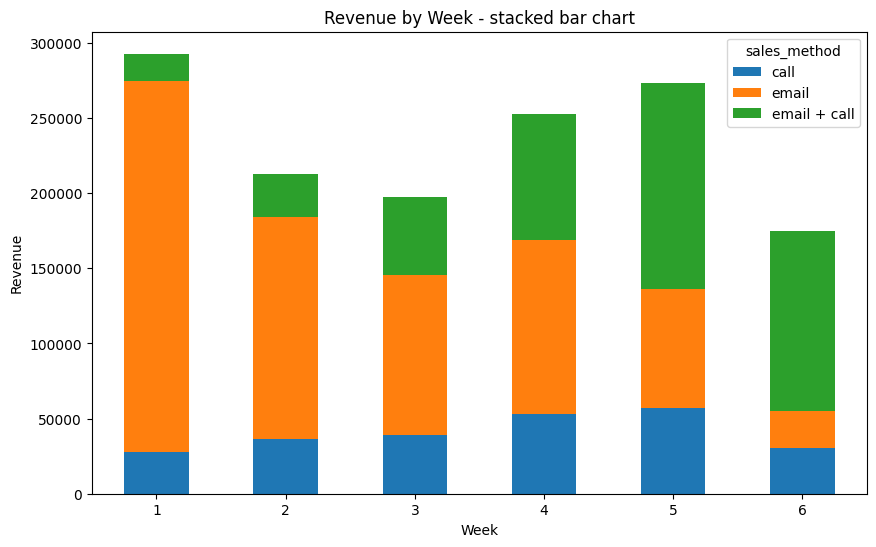

In [122]:
fig, ax = plt.subplots(figsize=[10, 6])
revenue_by_week = sales.groupby(['week','sales_method'])['revenue'].sum().unstack()
revenue_by_week.plot(kind='bar', stacked=True, ax=ax)
plt.title('Revenue by Week - stacked bar chart')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()


**Revenue by week - line plot**

Our further analysis has revealed a notable trend in the revenue generation by different communication methods. Specifically, while the revenue generated through email alone is declining significantly week by week, the revenue generated by email and call is increasing steadily.

Moreover, we have observed that the revenue generated through the call method has remained relatively consistent and has not shown significant changes over time.


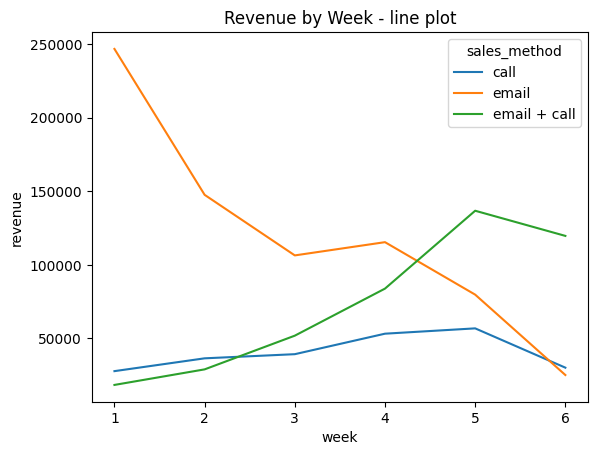

In [123]:
revenue_by_week_method = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_by_week_method)
plt.title('Revenue by Week - line plot')
plt.show()

**Business metrics**

- we analyzed the business metrics for Pens and Printers and found that the combination of email and call generates the highest average revenue by sales method. Moreover, this method is effective in increasing weekly revenue. Therefore, we recommend using this as a key metric for evaluating the sales performance.

- We also found that while email alone generates the highest revenue, it is crucial to note that most of the revenue is generated in the first week and decreases drastically afterward. Hence, we suggest adopting the 'email + call' method to sustain revenue growth over time.

- Furthermore, our analysis showed that customers using the email with call method tend to make purchases in higher values. Therefore, we propose using this as another key metric to evaluate customer behavior and preferences.


**Recommendations**

- The 'email and call' method can generate high-value purchases and reach a wide range of customers
- This method is more efficient than the call method, as it requires an average of only 10 minutes of call time and minimal effort from our team when sending the email
- Improving the email content can enhance the effectiveness of the 'email and call' method
- Following up with a call after sending the email can improve customer relationships and increase the likelihood of closing a deal
- Offering personalized deals to high-value customers can help prevent customer churn and increase loyalty
- Creating a feedback system in the email can provide valuable insights into customer preferences and needs
- Monitoring revenue over a longer period, such as monthly revenue, can help identify trends and inform necessary changes to the sales method.